In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
espn_df=pd.read_csv('/workspaces/final-project-22022658NguyenTienKhoi/Data/ESPN.csv')

In [3]:
processed_df = espn_df.dropna(subset='reactions')

In [4]:
processed_df

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,900721321423473,Career night for Donovan Clingan 👏\n\nĐêm sự n...,Career night for Donovan Clingan 👏\n\nĐêm sự n...,NaN,Career night for Donovan Clingan 👏,2023-11-28 02:08:15,1701137295,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/ESPN/posts/9007213214...,"{'thích': 222, 'yêu thích': 24, 'haha': 2, 'wo...",252,NaN,104266592953439,NaN,9.007213e+14,['900721311423474'],False,2023-11-28 12:59:15.732624
1,900694594759479,Minnesota legend Adrian Peterson is back in th...,Minnesota legend Adrian Peterson is back in th...,NaN,Minnesota legend Adrian Peterson is back in th...,2023-11-28 00:44:35,1701132275,NaN,https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/ESPN/posts/9006945947...,"{'thích': 1341, 'yêu thích': 245, 'haha': 8, '...",1610,NaN,104266592953439,NaN,NaN,[],False,2023-11-28 12:59:20.309644
2,900689998093272,LeBron James HAS NOW PLAYED THE MOST MINUTES I...,LeBron James HAS NOW PLAYED THE MOST MINUTES I...,NaN,LeBron James HAS NOW PLAYED THE MOST MINUTES I...,2023-11-28 00:29:27,1701131367,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/ESPN/posts/9006899980...,"{'thích': 8683, 'yêu thích': 2219, 'haha': 144...",12644,NaN,104266592953439,NaN,9.006900e+14,['900689978093274'],False,2023-11-28 12:59:26.571036
3,900672414761697,Breaking: Minnesota Wild head coach Dean Evaso...,Breaking: Minnesota Wild head coach Dean Evaso...,NaN,Breaking: Minnesota Wild head coach Dean Evaso...,2023-11-27 23:31:16,1701127876,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...,['https://m.facebook.com/photo/view_full_size/...,...,https://www.facebook.com/ESPN/posts/9006724147...,"{'thích': 2010, 'yêu thích': 46, 'haha': 243, ...",3198,NaN,104266592953439,NaN,9.006724e+14,['900672398095032'],False,2023-11-28 12:59:30.350545
4,900569524771986,The Minnesota Vikings have the edge over the C...,The Minnesota Vikings have the edge over the C...,NaN,The Minnesota Vikings have the edge over the C...,2023-11-27 18:16:29,1701108989,NaN,https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...,[],...,https://www.facebook.com/ESPN/posts/9005695247...,"{'thích': 1120, 'yêu thích': 49, 'haha': 205, ...",1407,NaN,104266592953439,NaN,9.005695e+14,['900569511438654'],False,2023-11-28 12:59:32.686893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,895900865238852,Jordan Travis was carted off the field after s...,Jordan Travis was carted off the field after s...,NaN,Jordan Travis was carted off the field after s...,2023-11-19 00:43:16,1700354596,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...,['https://scontent-sin6-4.xx.fbcdn.net/v/t39.3...,...,https://www.facebook.com/ESPN/posts/8959008652...,"{'thích': 5043, 'yêu thích': 371, 'haha': 71, ...",11852,NaN,104266592953439,NaN,8.959009e+14,['895900851905520'],False,2023-11-28 13:06:02.541829
96,325220766932325,"Sam Ravech, Skubie Mageza, and Matt Simms take...","Sam Ravech, Skubie Mageza, and Matt Simms take...",NaN,NaN,2023-11-18 23:58:49,1700351929,NaN,https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...,[],...,https://www.facebook.com/ESPN/posts/3252207669...,"{'thích': 68, 'yêu thích': 13, 'haha': 1, 'buồ...",83,NaN,104266592953439,NaN,NaN,[],False,2023-11-28 13:06:05.837636
97,895864238575848,WHAT A GAME‼️\n\nApp State Football takes down...,WHAT A GAME‼️\n\nApp State Football takes down...,NaN,NaN,2023-11-18 23:00:05,1700348405,https://m.facebook.com/photo/view_full_size/?f...,https://scontent-

In [17]:
reactions = processed_df['reactions']
react = []
for i in range(100):
    state = dict(eval(reactions.iloc[i]))
    react.append(state['thích'] + state['yêu thích'])
posi_react = pd.Series(react)


<Axes: >

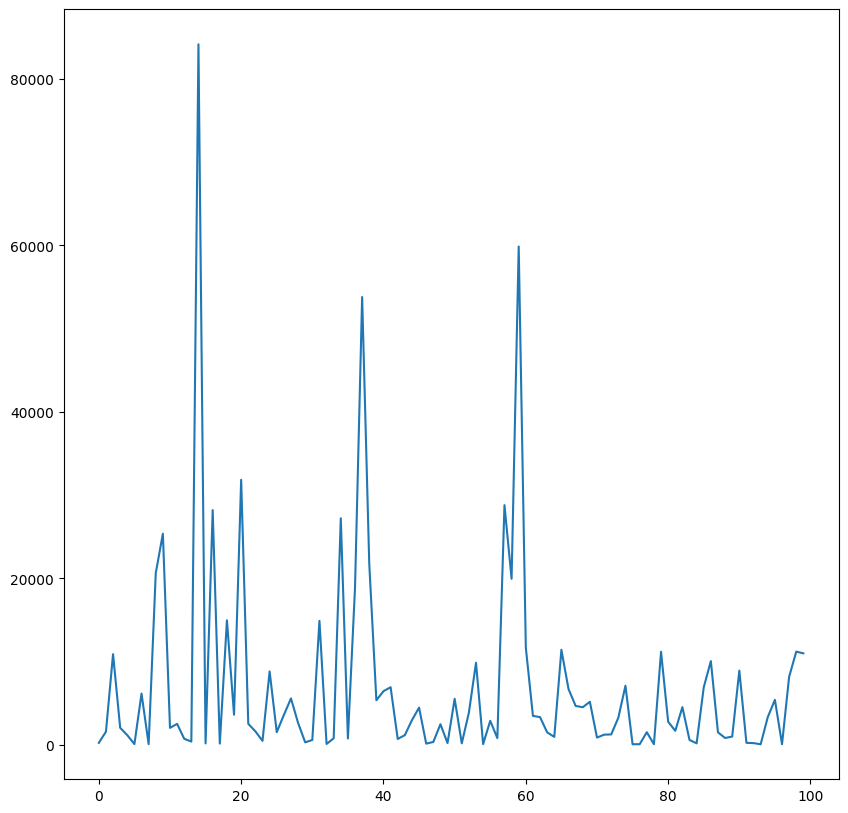

In [18]:
posi_react.plot(kind = 'line',figsize=(10,10))

<Axes: >

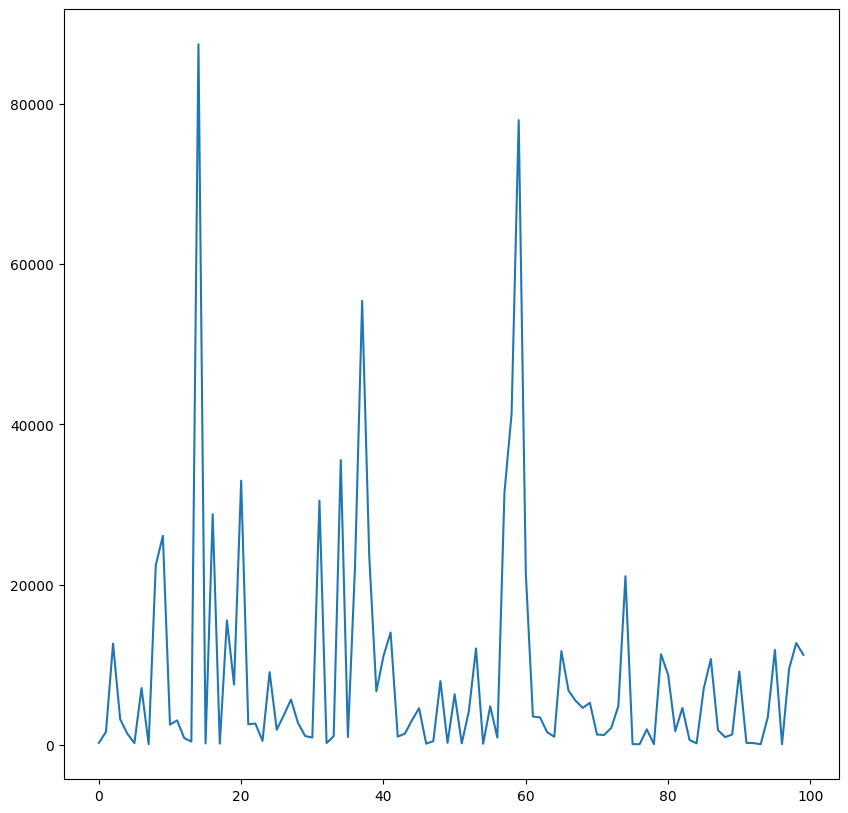

In [19]:
processed_df['reaction_count'].plot(kind='line',figsize=(10,10))

In [29]:
print(processed_df.iloc[41]['reactions'])
print(processed_df.iloc[41]['post_text'])

{'thích': 6673, 'yêu thích': 259, 'haha': 6945, 'wow': 102, 'thương thương': 23, 'buồn': 17, 'phẫn nộ': 5}
What a comparison 😳

Thật là so sánh 😳


In [33]:
print(processed_df.iloc[34]['reactions'])
print(processed_df.iloc[34]['post_text'])

{'thích': 23511, 'yêu thích': 3716, 'haha': 7952, 'wow': 113, 'thương thương': 173, 'buồn': 20, 'phẫn nộ': 49}
George Kittle took the entire turkey and started passing it out to San Francisco 49ers fans 🦃😂

📺 NBC

George Kittle đã lấy toàn bộ con gà tây và bắt đầu chuyển nó cho người hâm mộ San Francisco 49ers 🦃😂

📺 NBC


Thống kê dao động reactions theo giờ

Text(0.5, 0, 'day in month')

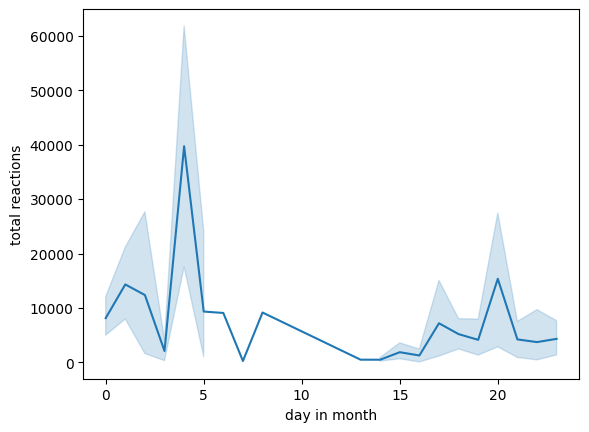

In [35]:
time_df = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=time_df.dt.hour,y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("day in month")

số lượng reaction ổn định trong khoảng 5h đến 14h, giao động mạnh khi đến chiều tối và đêm

**Thống kê dao động reaction theo trung bình ngày**

Text(0.5, 0, 'day in month')

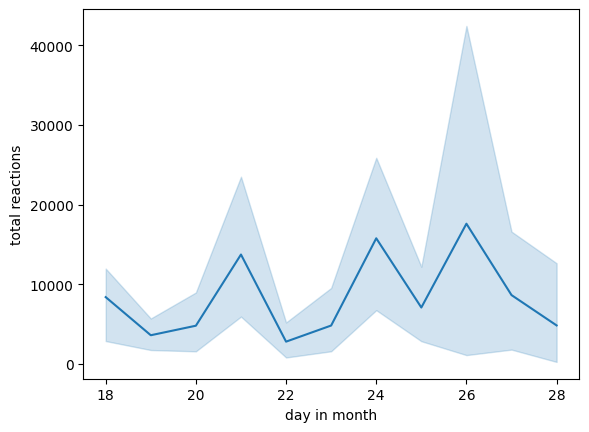

In [34]:
time_df = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=time_df.dt.day,y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("day in month")

Rất ít kết luận được rút ra từ biểu đồ, có thể thấy số lượt reaction dao động mạnh theo ngày, tùy theo sự kiện xảy ra
và ngày đó và nội dung post được đăng

Text(0.5, 0, 'day in month')

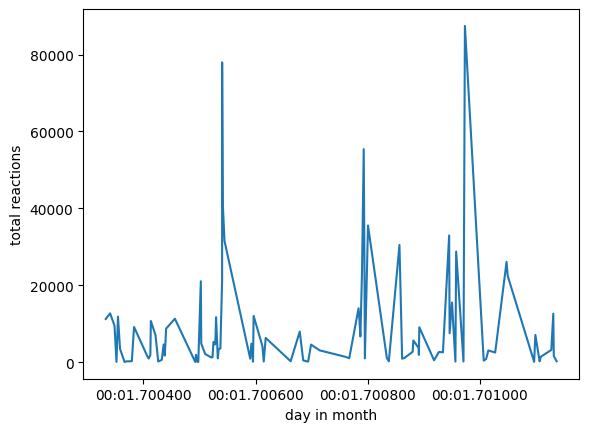

In [31]:
time_df = pd.to_datetime(processed_df['timestamp'])
ax = sns.lineplot(x=time_df,y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("day in month")

Text(0.5, 0, 'a day')

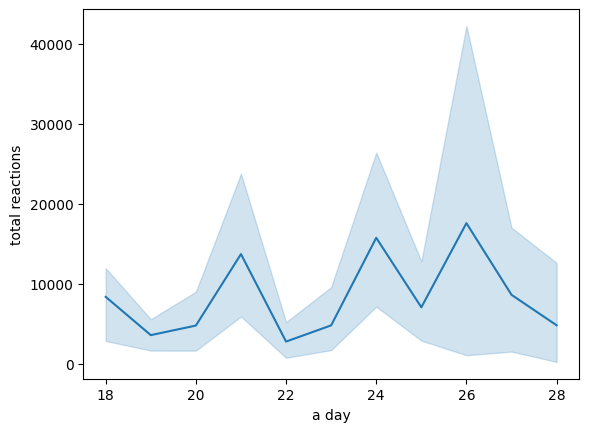

In [37]:
processed_df['time'] = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=processed_df['time'].dt.day,y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("a day")

In [52]:
comments = processed_df.loc[processed_df['comments'] > 1000] 
comments['comments']

2     3670
8     4448
9     3316
11    3354
14    4493
16    3675
18    2877
19    8757
20    5825
24    1833
31    6074
33    1075
34    1558
36    1660
37    4621
38    4170
39    2417
40    1881
41    2307
48    1064
52    2312
53    2809
55    1691
57    5050
58    2565
59    2292
60    7485
67    1572
73    1747
74    3291
79    1026
80    1304
86    1297
88    1033
90    1098
95    1763
97    1022
98    2595
Name: comments, dtype: int64

<Axes: >

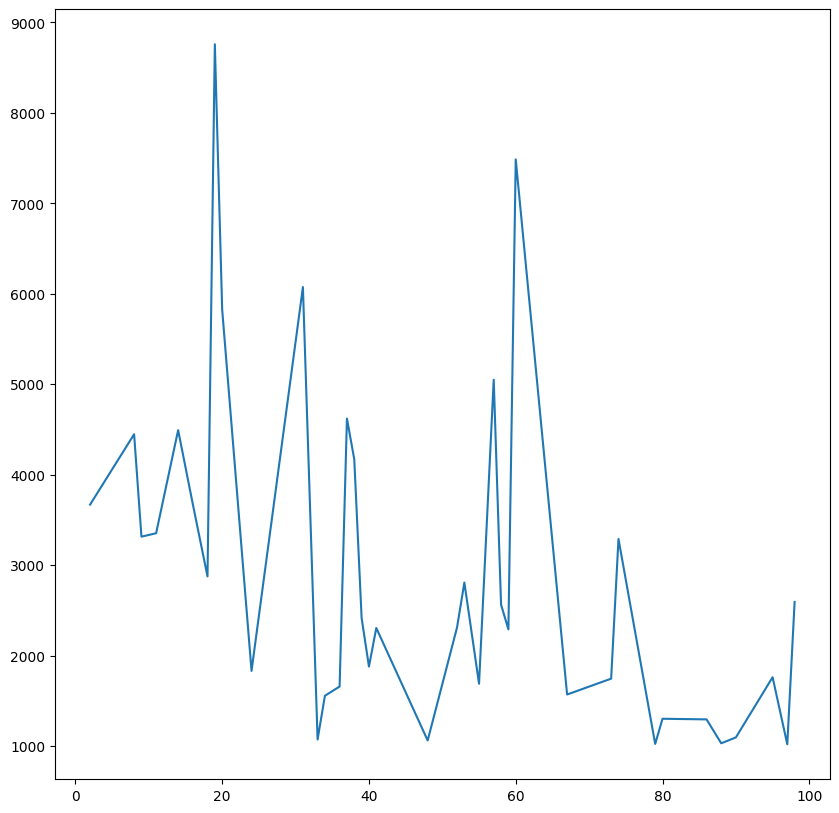

In [53]:
comments['comments'].plot(kind='line',figsize=(10,10))

In [12]:
df_text = processed_df[['post_id','post_text']]
text    = str(df_text['post_text'])



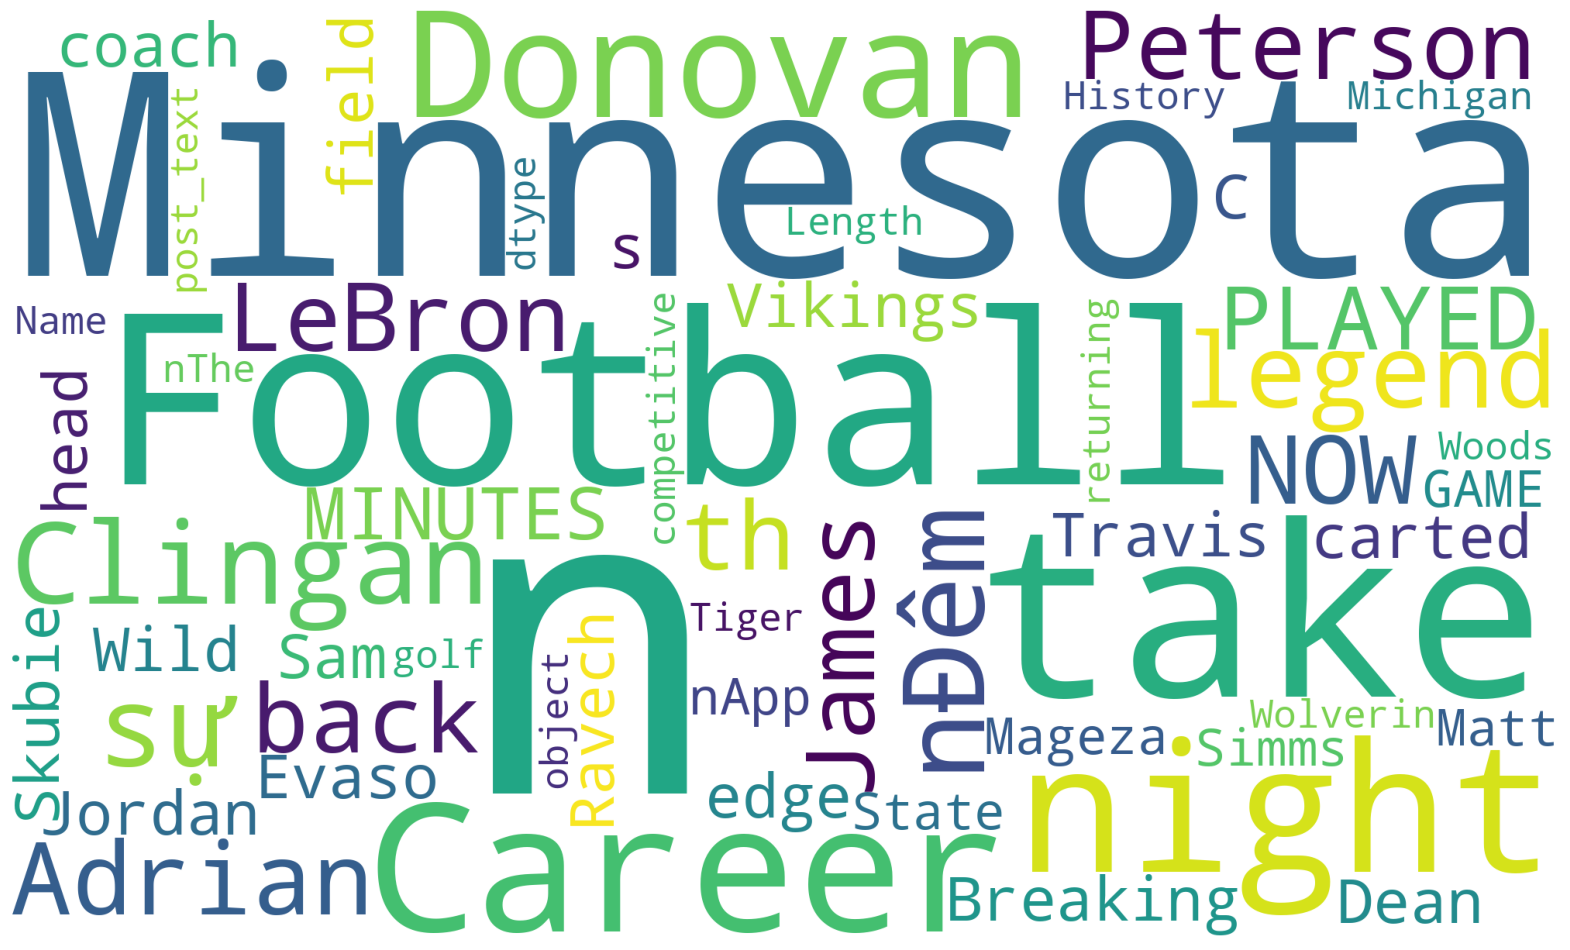

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [38]:
def get_top_n(processed_df, n):
    result = dict(sorted(processed_df.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 10)


NameError: name 'tf_idf_score' is not defined